### About the company
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. 
The bikes can be unlocked from one station and returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. 

Customers who purchase annual memberships are Cyclistic members. Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be key to future growth. 

Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic
program and have chosen Cyclistic for their mobility needs.

Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order todo that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.

### Scenario
You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director
of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore,
your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights,
your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives
must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations

### Problem Statement:
   - Understanding the differences in the usage patterns of Cyclistic bikes between casual riders and annual members to design a      new marketing strategy aimed at converting casual riders into annual members.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os

In [2]:
df = pd.read_csv(r"E:\Python_dataset\202306-divvy-tripdata.csv")
df1 = pd.read_csv(r"E:\Python_dataset\Case Study 1 Dataset\202305-divvy-tripdata\202305-divvy-tripdata.csv")
df2 = pd.read_csv(r"E:\Python_dataset\Case Study 1 Dataset\202304-divvy-tripdata\202304-divvy-tripdata.csv")
df3 = pd.read_csv(r"E:\Python_dataset\Case Study 1 Dataset\202303-divvy-tripdata\202303-divvy-tripdata.csv")
df4 = pd.read_csv(r"E:\Python_dataset\Case Study 1 Dataset\202302-divvy-tripdata\202302-divvy-tripdata.csv")
df5 = pd.read_csv(r"E:\Python_dataset\Case Study 1 Dataset\202301-divvy-tripdata\202301-divvy-tripdata.csv")

In [3]:
bike = pd.concat([df,df1,df2,df3,df4,df5])

In [4]:
bike.shape

(2390459, 13)

In [5]:
bike.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6F1682AC40EB6F71,electric_bike,2023-06-05 13:34:12,2023-06-05 14:31:56,NaN,NaN,NaN,NaN,41.91,-87.69,41.91,-87.70,member
1,622A1686D64948EB,electric_bike,2023-06-05 01:30:22,2023-06-05 01:33:06,NaN,NaN,NaN,NaN,41.94,-87.65,41.94,-87.65,member
2,3C88859D926253B4,electric_bike,2023-06-20 18:15:49,2023-06-20 18:32:05,NaN,NaN,NaN,NaN,41.95,-87.68,41.92,-87.63,member
3,EAD8A5E0259DEC88,electric_bike,2023-06-19 14:56:00,2023-06-19 15:00:35,NaN,NaN,NaN,NaN,41.99,-87.65,41.98,-87.66,member
4,5A36F21930D6A55C,electric_bike,2023-06-19 15:03:34,2023-06-19 15:07:16,NaN,NaN,NaN,NaN,41.98,-87.66,41.99,-87.65,member


In [6]:
bike.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    357417
start_station_id      357549
end_station_name      380963
end_station_id        381104
start_lat                  0
start_lng                  0
end_lat                 2460
end_lng                 2460
member_casual              0
dtype: int64

In [7]:
[feactures for feactures in bike.columns if bike[feactures].isnull().sum()>0]

['start_station_name',
 'start_station_id',
 'end_station_name',
 'end_station_id',
 'end_lat',
 'end_lng']

<Axes: >

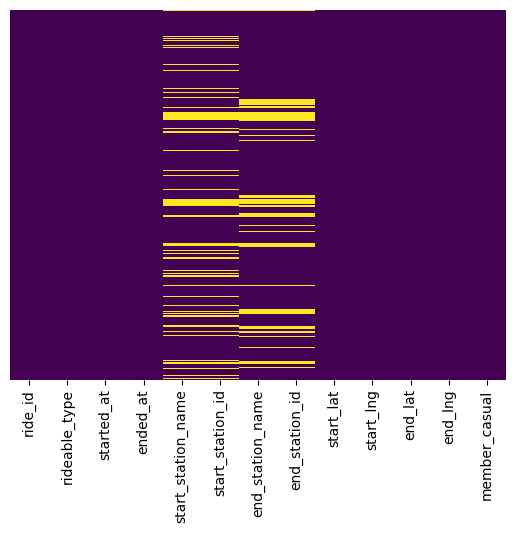

In [8]:
sns.heatmap(bike.isnull(),yticklabels=False,cbar=False, cmap='viridis')

In [9]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2390459 entries, 0 to 190300
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 255.3+ MB


In [10]:
# Changing the data types 

def data_types(df):
    # converting started_at and ended_at to date_time
    df['started_at'] = pd.to_datetime(df['started_at'])
    df['ended_at'] = pd.to_datetime(df['ended_at'])
    
    # converting start_station_id and end_station_id to string
    df['start_station_id'] = df['start_station_id'].astype(str)
    df['end_station_id'] = df['end_station_id'].astype(str)
    
    # Removing the duplicates
    df.drop_duplicates(inplace=True)
    
    return df 

# lets apply the function to the data
bike = data_types(bike)

In [11]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2390459 entries, 0 to 190300
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 255.3+ MB


### Dropping Irrelevant Columns

In [12]:
def delete_col(df, Irrelevant_Columns):
    df = df.drop(Irrelevant_Columns, axis=1)
    return df 

In [13]:
Irrelevant_Columns = ['start_station_id','end_station_id','ride_id']

bike = delete_col(bike, Irrelevant_Columns)

In [14]:
bike.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
0,electric_bike,2023-06-05 13:34:12,2023-06-05 14:31:56,NaN,NaN,41.91,-87.69,41.91,-87.70,member
1,electric_bike,2023-06-05 01:30:22,2023-06-05 01:33:06,NaN,NaN,41.94,-87.65,41.94,-87.65,member
2,electric_bike,2023-06-20 18:15:49,2023-06-20 18:32:05,NaN,NaN,41.95,-87.68,41.92,-87.63,member
3,electric_bike,2023-06-19 14:56:00,2023-06-19 15:00:35,NaN,NaN,41.99,-87.65,41.98,-87.66,member
4,electric_bike,2023-06-19 15:03:34,2023-06-19 15:07:16,NaN,NaN,41.98,-87.66,41.99,-87.65,member


In [15]:
import missingno as msno

<Axes: >

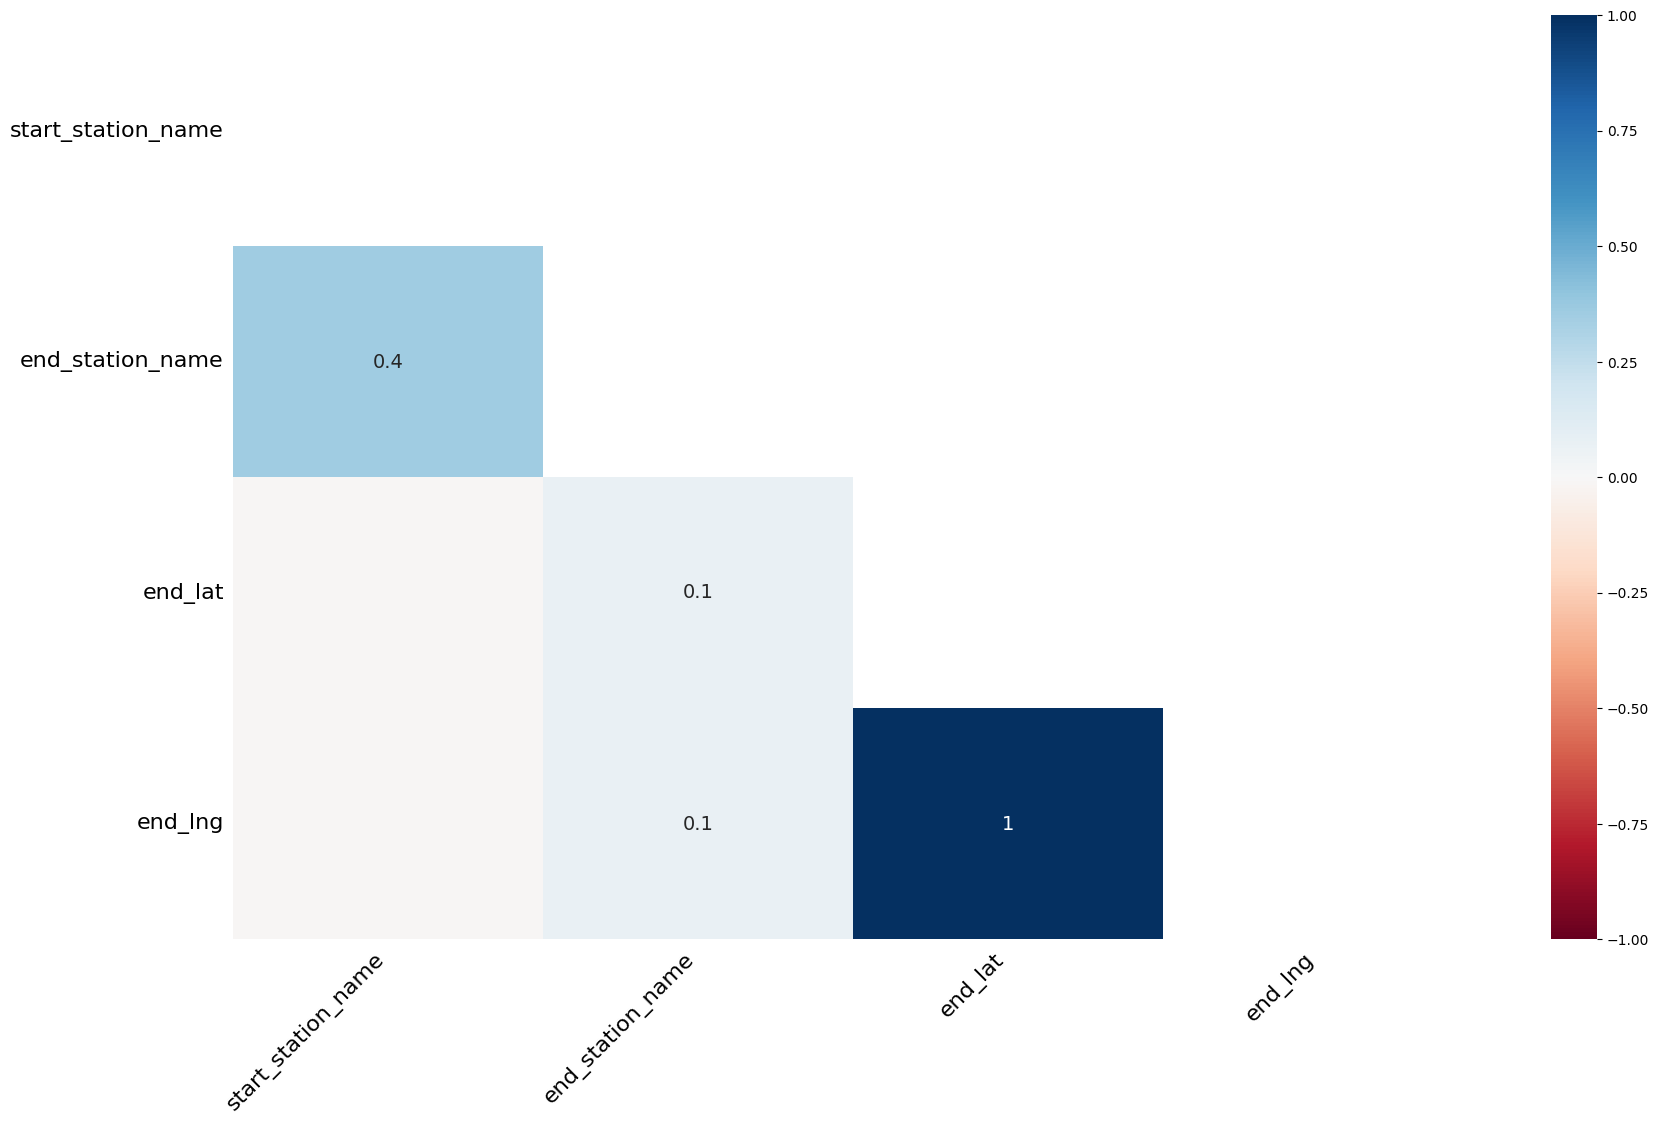

In [16]:
msno.heatmap(bike)

<Axes: >

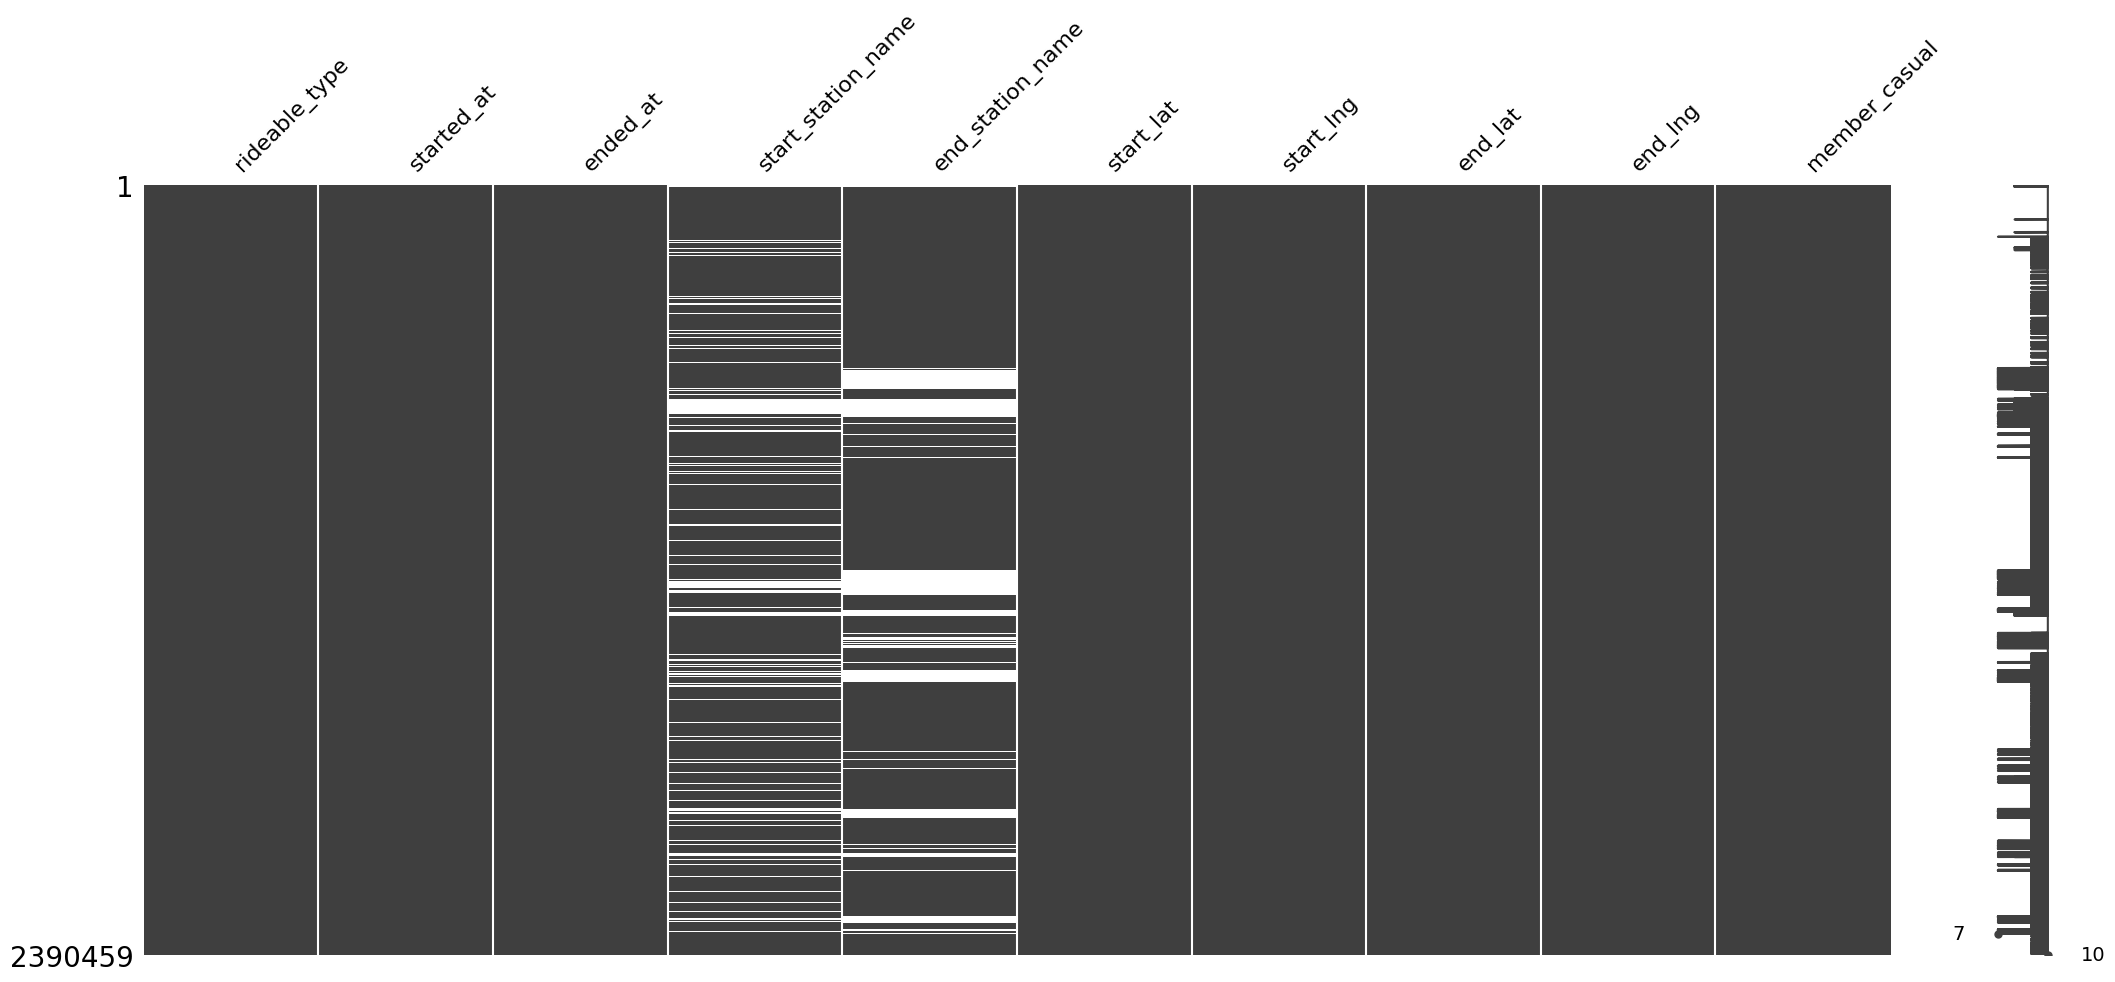

In [17]:
msno.matrix(bike)

In [18]:
# lets see percentage of the data missing 

missing_data = bike.isnull().mean() * 100
missing_data

rideable_type          0.000000
started_at             0.000000
ended_at               0.000000
start_station_name    14.951815
end_station_name      15.936814
start_lat              0.000000
start_lng              0.000000
end_lat                0.102909
end_lng                0.102909
member_casual          0.000000
dtype: float64

In [19]:
ms = missing_data[missing_data != 0]
ms

start_station_name    14.951815
end_station_name      15.936814
end_lat                0.102909
end_lng                0.102909
dtype: float64

In [20]:
bike.describe()

,start_lat,start_lng,end_lat,end_lng
count,2.390459e+06,2.390459e+06,2.387999e+06,2.387999e+06
mean,4.190232e+01,-8.764733e+01,4.190263e+01,-8.764742e+01
std,4.563823e-02,2.779486e-02,5.970010e-02,8.492533e-02
min,4.164000e+01,-8.787000e+01,0.000000e+00,-8.816000e+01
25%,4.188096e+01,-8.766028e+01,4.188096e+01,-8.766120e+01
50%,4.189859e+01,-8.764410e+01,4.189918e+01,-8.764410e+01
75%,4.193000e+01,-8.763000e+01,4.193000e+01,-8.763000e+01
max,4.207000e+01,-8.752000e+01,4.211000e+01,0.000000e+00


In [21]:
bike['start_station_name'].fillna('Unknown', inplace=True)
bike['end_station_name'].fillna('Unknown', inplace=True)

In [22]:
bike.isnull().sum()

rideable_type            0
started_at               0
ended_at                 0
start_station_name       0
end_station_name         0
start_lat                0
start_lng                0
end_lat               2460
end_lng               2460
member_casual            0
dtype: int64

In [23]:
bike.dropna(subset=['end_lat','end_lng'], inplace=True)

<Axes: >

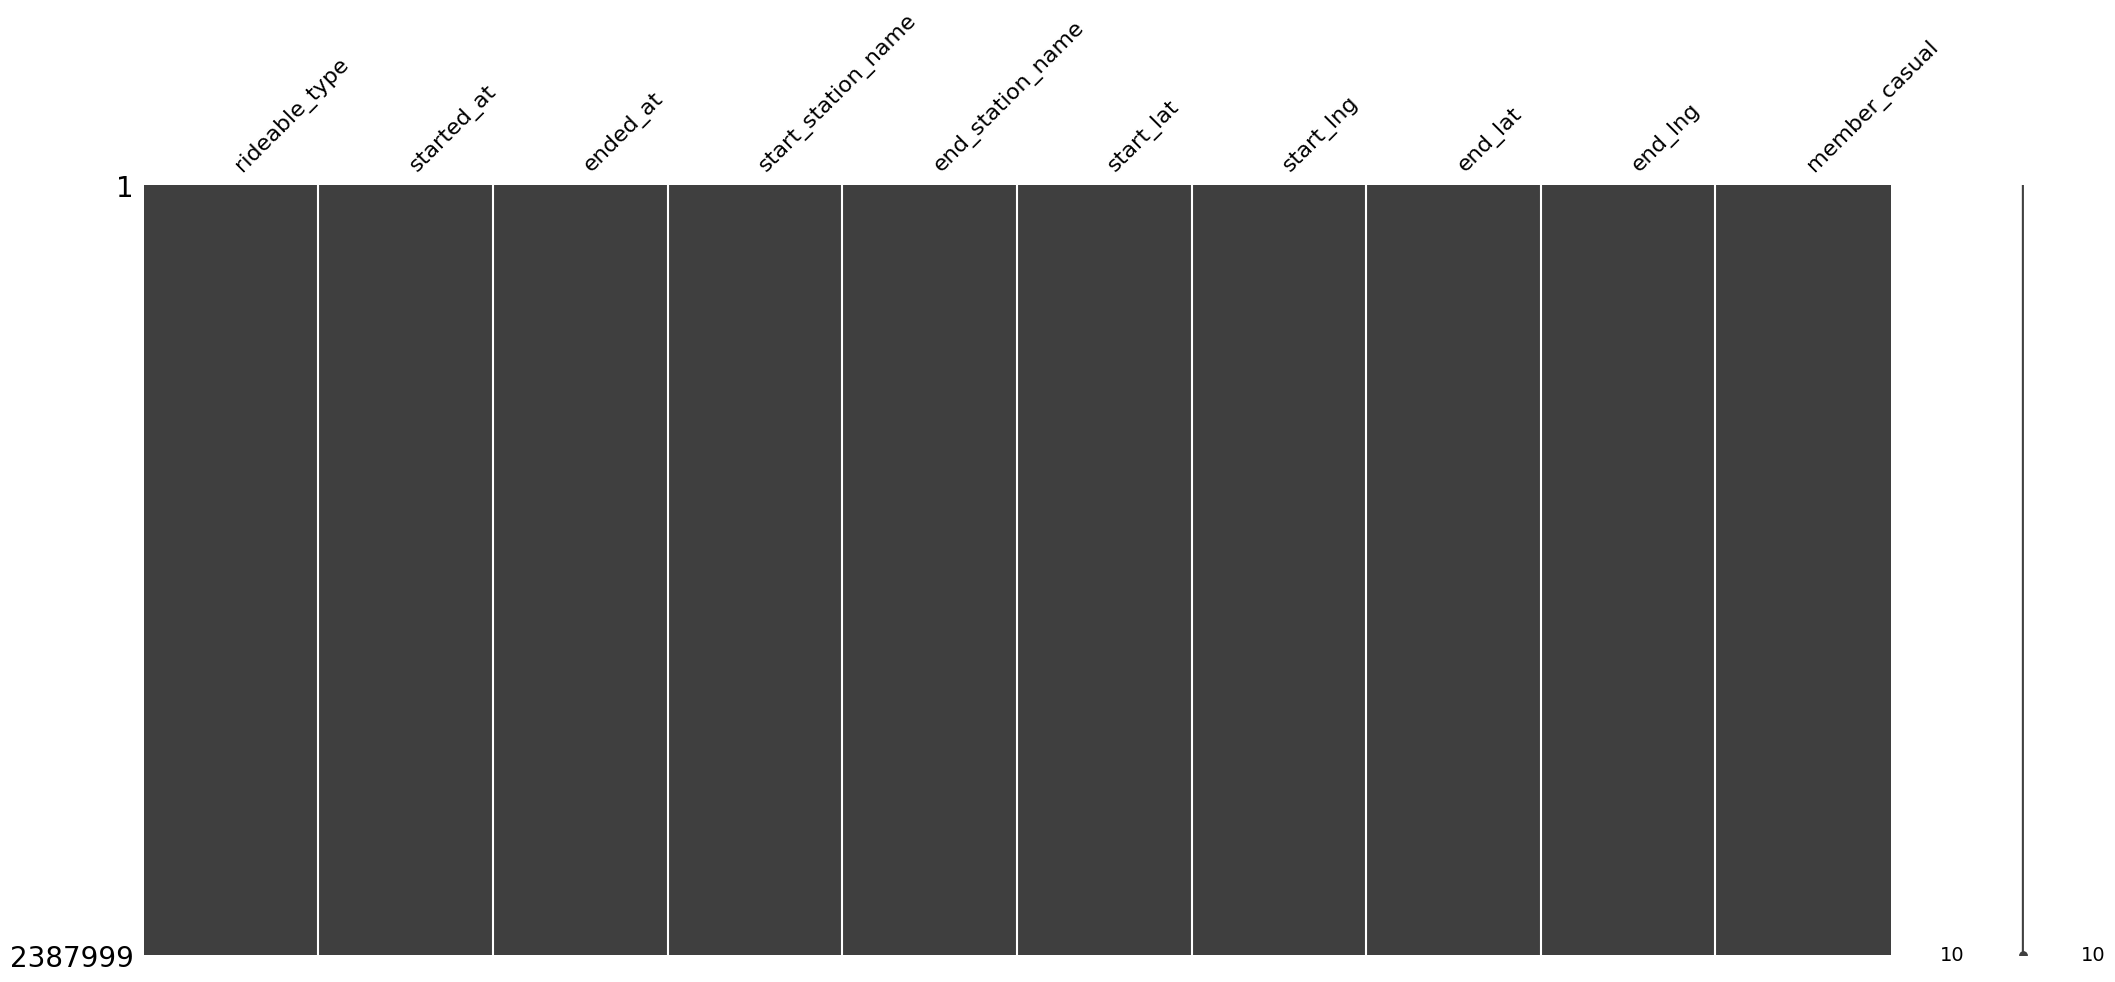

In [24]:
msno.matrix(bike)

In [25]:
bike.isnull().sum()

rideable_type         0
started_at            0
ended_at              0
start_station_name    0
end_station_name      0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [26]:
bike.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
0,electric_bike,2023-06-05 13:34:12,2023-06-05 14:31:56,Unknown,Unknown,41.91,-87.69,41.91,-87.70,member
1,electric_bike,2023-06-05 01:30:22,2023-06-05 01:33:06,Unknown,Unknown,41.94,-87.65,41.94,-87.65,member
2,electric_bike,2023-06-20 18:15:49,2023-06-20 18:32:05,Unknown,Unknown,41.95,-87.68,41.92,-87.63,member
3,electric_bike,2023-06-19 14:56:00,2023-06-19 15:00:35,Unknown,Unknown,41.99,-87.65,41.98,-87.66,member
4,electric_bike,2023-06-19 15:03:34,2023-06-19 15:07:16,Unknown,Unknown,41.98,-87.66,41.99,-87.65,member


In [27]:
ride_length = (bike['ended_at'] - bike['started_at']).dt.total_seconds() / 60
ride_length

0         57.733333
1          2.733333
2         16.266667
3          4.583333
4          3.700000
            ...    
190296    11.133333
190297    25.266667
190298    15.183333
190299    15.333333
190300    11.000000
Length: 2387999, dtype: float64

In [28]:
# Lets create the column 'ride_length' in minutes by substracting ('end_at' - 'started_at')

bike['ride_length'] = (bike['ended_at'] - bike['started_at']).dt.total_seconds() / 60

In [29]:
# Create bins for ride length
bins = [0, 10, 20, 30, 40, 50, 60, np.inf]
names = ['<10', '10-20', '20-30', '30-40', '40-50', '50-60', '60+']

# Create a new column for ride length category
bike['ride_length_category'] = pd.cut(bike['ride_length'], bins, labels=names)
    

In [30]:
# lets see the day of the week this will help us see which days of the week we see most rides

bike['day_of_week'] = bike['started_at'].dt.day_name()

In [31]:
bike['hour'] = bike['started_at'].dt.hour
bike['month'] = bike['started_at'].dt.month
bike['year'] = bike['started_at'].dt.year

In [32]:
bike.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,ride_length_category,day_of_week,hour,month,year
0,electric_bike,2023-06-05 13:34:12,2023-06-05 14:31:56,Unknown,Unknown,41.91,-87.69,41.91,-87.70,member,57.733333,50-60,Monday,13,6,2023
1,electric_bike,2023-06-05 01:30:22,2023-06-05 01:33:06,Unknown,Unknown,41.94,-87.65,41.94,-87.65,member,2.733333,<10,Monday,1,6,2023
2,electric_bike,2023-06-20 18:15:49,2023-06-20 18:32:05,Unknown,Unknown,41.95,-87.68,41.92,-87.63,member,16.266667,10-20,Tuesday,18,6,2023
3,electric_bike,2023-06-19 14:56:00,2023-06-19 15:00:35,Unknown,Unknown,41.99,-87.65,41.98,-87.66,member,4.583333,<10,Monday,14,6,2023
4,electric_bike,2023-06-19 15:03:34,2023-06-19 15:07:16,Unknown,Unknown,41.98,-87.66,41.99,-87.65,member,3.700000,<10,Monday,15,6,2023


In [33]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2387999 entries, 0 to 190300
Data columns (total 16 columns):
 #   Column                Dtype         
---  ------                -----         
 0   rideable_type         object        
 1   started_at            datetime64[ns]
 2   ended_at              datetime64[ns]
 3   start_station_name    object        
 4   end_station_name      object        
 5   start_lat             float64       
 6   start_lng             float64       
 7   end_lat               float64       
 8   end_lng               float64       
 9   member_casual         object        
 10  ride_length           float64       
 11  ride_length_category  category      
 12  day_of_week           object        
 13  hour                  int64         
 14  month                 int64         
 15  year                  int64         
dtypes: category(1), datetime64[ns](2), float64(5), int64(3), object(5)
memory usage: 293.8+ MB


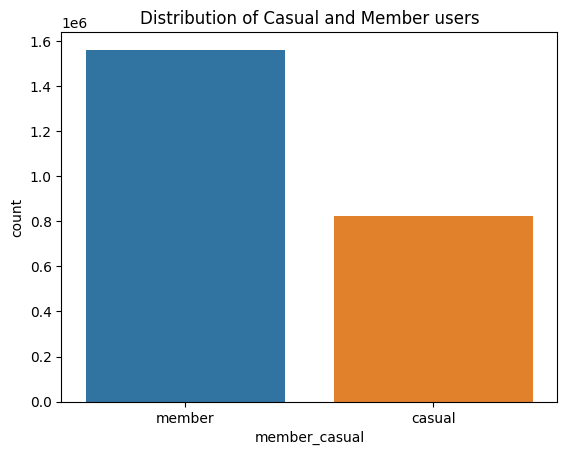

In [34]:
sns.countplot(bike, x="member_casual")
plt.title("Distribution of Casual and Member users")
plt.show()

In [35]:
user_counts = bike['member_casual'].value_counts().values

In [36]:
user= bike['member_casual'].value_counts().index
user

Index(['member', 'casual'], dtype='object')

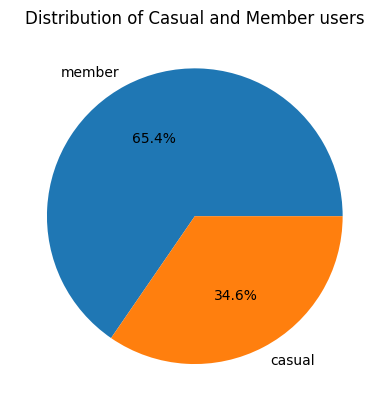

In [37]:
plt.pie(user_counts,labels=user, autopct="%1.1f%%")
plt.title("Distribution of Casual and Member users")
plt.show()

#### Observation:
    1) Based on the distribution of the casual and member user people with membership are more than the casual riders,
       we can say that the members are using the service for their daily travel such as going to work,
       school etc.
    2) High no.of members could also mean high customer loyalty may be because of the ease of use of the 
       service.
    

In [38]:
bike.columns

Index(['rideable_type', 'started_at', 'ended_at', 'start_station_name',
       'end_station_name', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'ride_length', 'ride_length_category', 'day_of_week',
       'hour', 'month', 'year'],
      dtype='object')

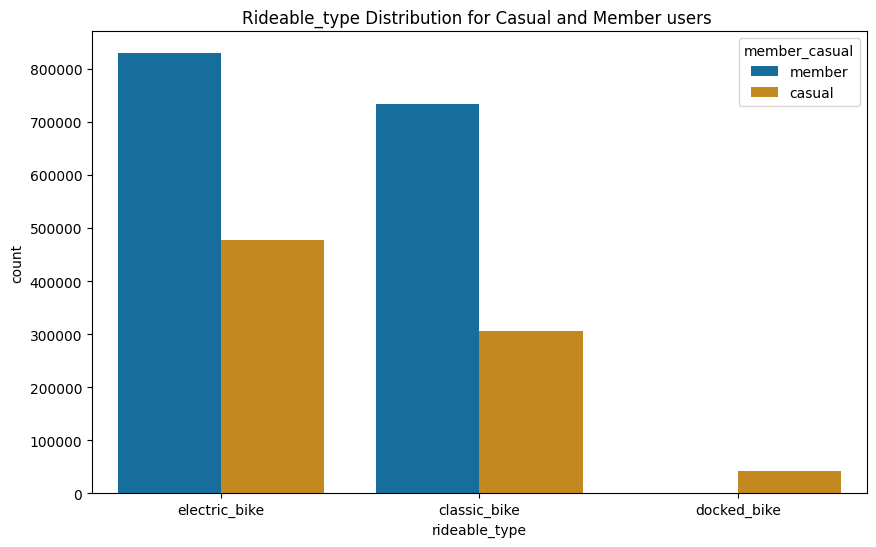

In [39]:
# setting the fig size

plt.figure(figsize=(10,6))

# Create a custom palette
palette = sns.color_palette("colorblind")

sns.countplot(x ='rideable_type', hue = 'member_casual',data = bike, palette = palette )
plt.title("Rideable_type Distribution for Casual and Member users ")
plt.show()

#### Observation:

    1. Electric bike:- Electric bikes seems to be more popular with both users. Around 800k members and 495k casual 
       rider prefers this bike.        
    2. Classic bike:- Classic bike are also having some good number of peolple who prefer this bike.
        We can see around 740k members and 300k casual riders who prefer this bike.
    3. Docked bike:- Docked bike seems to be only used by casual riders with count of 50k
    
    From above observation we can say that there are some personal preferences, ease of use and availability of 
    the bikes at that perticular time.

In [40]:
# top 10 stations
top_stations = bike['start_station_name'].value_counts().head(10).index


In [41]:
# Filter the data to include only top 10 
top_stations_df = bike[bike['start_station_name'].isin(top_stations)]

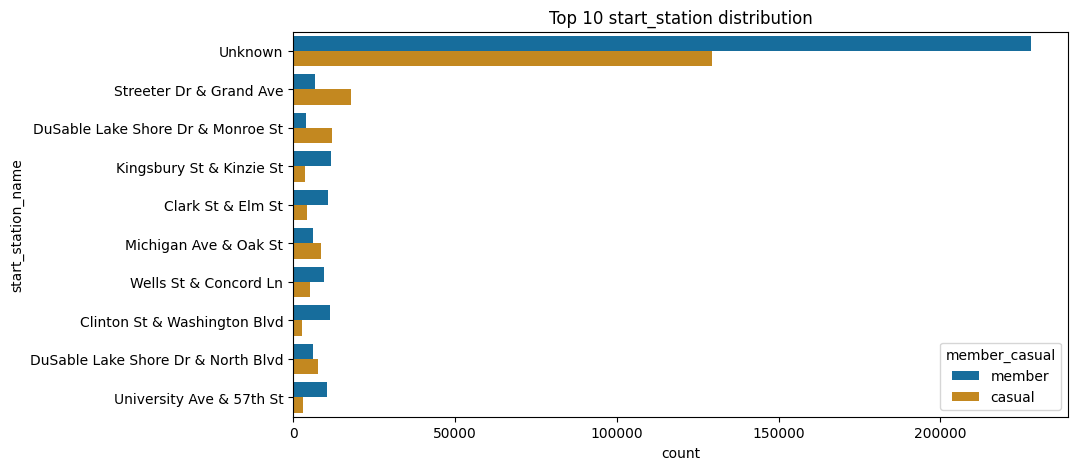

In [42]:
plt.figure(figsize=(10, 5))
sns.countplot(y = 'start_station_name', hue ='member_casual', data=top_stations_df, palette=palette, order=top_stations)
plt.title("Top 10 start_station distribution")
plt.show()

### Observations:
   1. As we can see top 10 start stations distribution together with the unknwon values makes it harder
      to indentify trends and patterns about the category.
   2. The significantly higher number of member riders in the unknown category suggests that member riders
      have a wider variety in their choice of start stations.

In [43]:
# Exclude unknown from data
filtered_df = bike[~bike['start_station_name'].isin(['Unknown'])]

# calculate top 10 start_station_name 
top_start_stations = filtered_df['start_station_name'].value_counts().head(10).index

# filtering data to include top 10 start_station_name
top_start_stations_df = filtered_df[filtered_df['start_station_name'].isin(top_start_stations)]

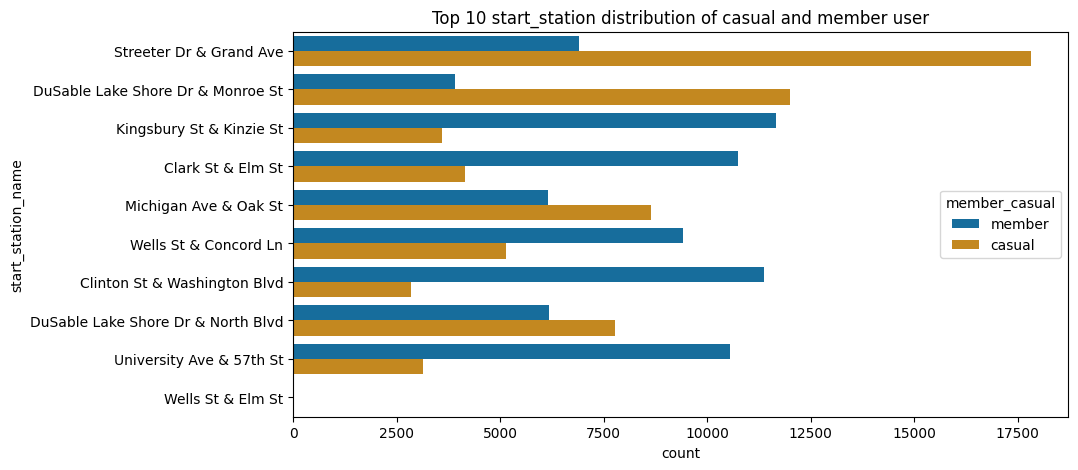

In [44]:
plt.figure(figsize=(10, 5))
sns.countplot(y = 'start_station_name', hue ='member_casual', data=top_stations_df, palette=palette, order=top_start_stations)
plt.title("Top 10 start_station distribution of casual and member user")
plt.show()

### Observations:
   1) In these start stations we can see that casual riders sligtly outnumber the members this is happening at 
       the top 2 stations due to high popularity.
   2) So there might be some attraction near by like parks, tourist spots etc or may be availability of the bikes. 

In [45]:
bike.columns

Index(['rideable_type', 'started_at', 'ended_at', 'start_station_name',
       'end_station_name', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'ride_length', 'ride_length_category', 'day_of_week',
       'hour', 'month', 'year'],
      dtype='object')

In [46]:
# Exclude unknown from data
filtered_df = bike[~bike['end_station_name'].isin(['Unknown'])]

# calculate top 10 end_station_name 
top_end_station = filtered_df['end_station_name'].value_counts().head(10).index

# filtering data to include top 10 end_station_name
top_end_station_df = filtered_df[filtered_df['end_station_name'].isin(top_start_stations)]

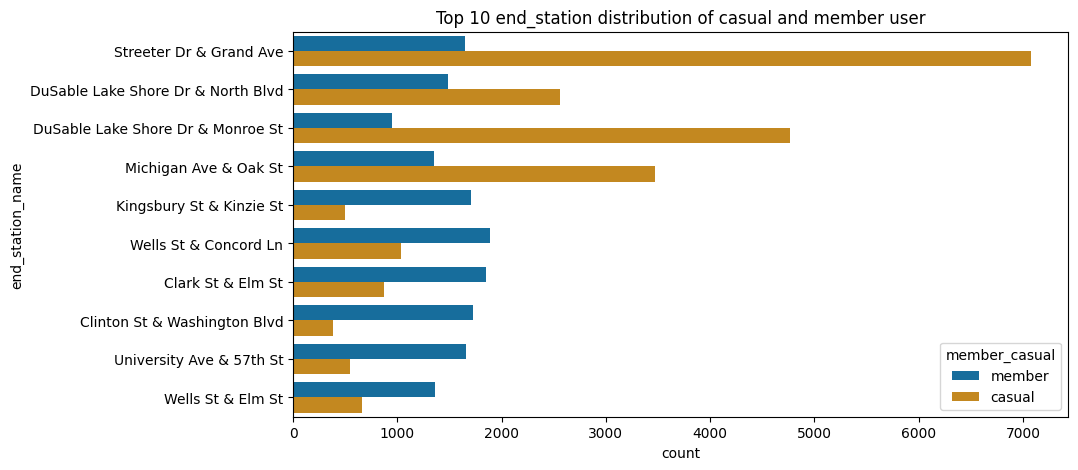

In [59]:
plt.figure(figsize=(10, 5))
sns.countplot(y = 'end_station_name', hue ='member_casual', data=top_stations_df, palette=palette, order=top_start_stations)
plt.title("Top 10 end_station distribution of casual and member user")
plt.show()

### Observations:
   1) It appears that most popular start and end stations are having high no.of causal riders than memebers
       this could mean that places near the attraction are touriest spots.
   2) By understanding the habits of casual rider where riders often begin or end their trips we can focus on these type
       of riders
   3) Casual riders will more likely prefer to take the membership if they start and end their trips in these stations.

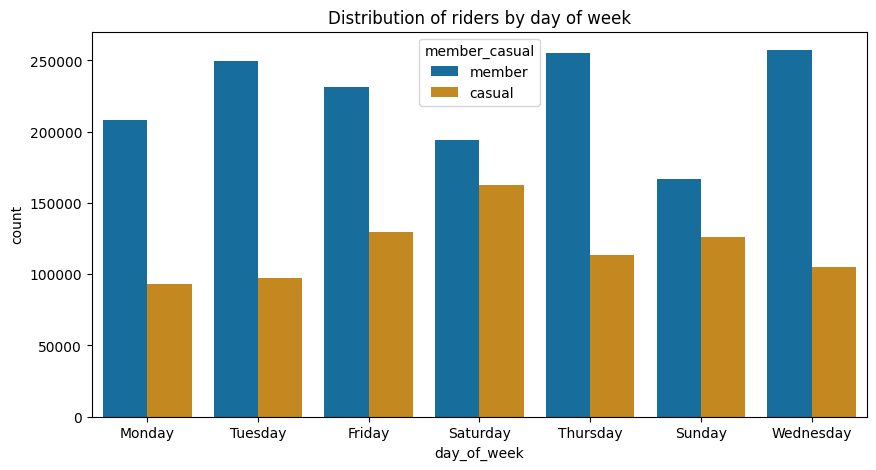

In [48]:
plt.figure(figsize=(10, 5))

sns.countplot(x='day_of_week', hue='member_casual', data=bike, palette=palette)
plt.title("Distribution of riders by day of week")
plt.show()

### Observation:
   1) In this day of the week distribution the count of memeber user increses from Monday 
       it peaks at Thursday and Wednesday. And it is the lowest on Sunday.
   2) From this we can say the member users are using the bike more frquently on the 
       work days and the count is low on weekends such as Saturday and Sunday.
   3) For casual users count is highest on Friday, Saturday and Sunday this pattern suggest
       that they may be using the bikes for exercising, visiting friends or visiting nearby places.

In [49]:
month_mapping = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
                 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

# Map the numeric values to actual month names
bike['month'] = bike['month'].map(month_mapping)


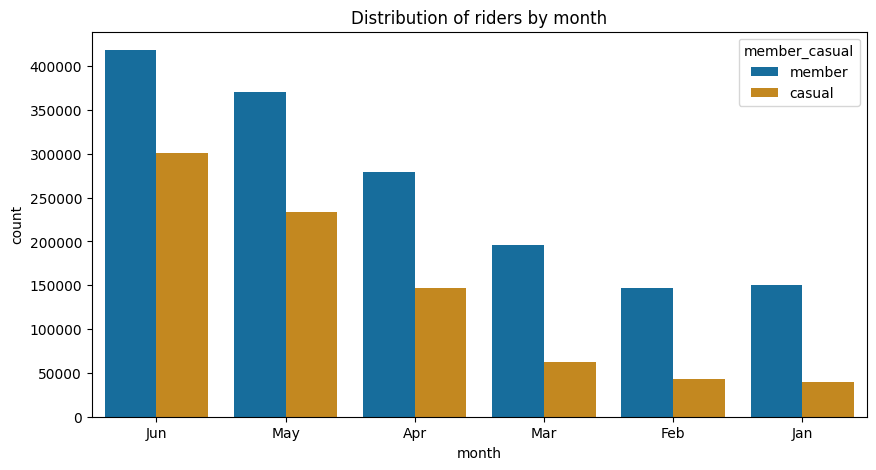

In [48]:
plt.figure(figsize=(10, 5))

sns.countplot(x='month', hue='member_casual', data=bike, palette=palette)
plt.title("Distribution of riders by month")
plt.show()

### Observation:
   1) In this monthly ride distribution on the 6 months of data we can see the pattern that bike usage 
       gradually increase from Jan to Jun. This pattern most likely linked to the seasons during warmer 
       seasons in May, June it is the highest.
   2) From this we can say that both user types prefer to use the bikes during warmer seasons due to 
       favorable weather conditions.

In [50]:
bike.columns

Index(['rideable_type', 'started_at', 'ended_at', 'start_station_name',
       'end_station_name', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'ride_length', 'ride_length_category', 'day_of_week',
       'hour', 'month', 'year'],
      dtype='object')

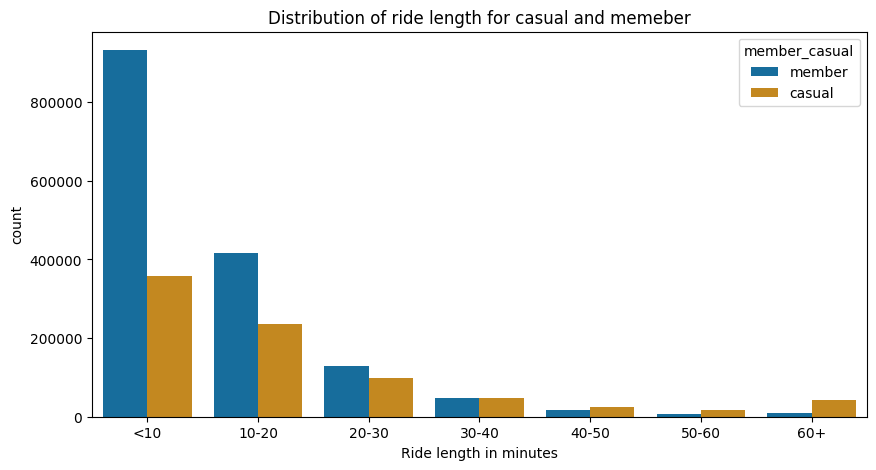

In [53]:
plt.figure(figsize=(10, 5))

sns.countplot(x='ride_length_category', hue='member_casual', data=bike, palette=palette)
plt.title("Distribution of ride length for casual and memeber")
plt.xlabel("Ride length in minutes")
plt.show()

#### Observation:
   1) From ride length distribution data we can see both casual and member riders prefer shorter
       rides this shows that users are using the bikes for short distance travels.
   2) This indicates that most rides are short but there is considerable amount of long riders ars
       also there mostly casual riders.
   3) This could suggest that casual users are more likely to use bikes for longer exploratory rides

### Recomendations:- 
1) Targating the markating campains at popular stations:-  This could attract more casual members to take the membership
   as most of casual riders visit these stations frequently. Implementing the campains at these stations will attract the 
   riders to get the membership.
2) Promote weekend rides:- Casual riders tends to use the service more frequently on weekends by promoting weekend rides we can    also attract more casual riders. 
3) Seasonal promotion:- Usage of bikes increases in summer so planing marketing campaigns during warmer seasons will be 
   beneficial to attract casual riders.

### Conclusion:- 
    Through this analysis of the Cyclistic bike-share program, we uncovered several key insights that could guide the 
    company's future marketing strategies. And the above recomendations will also help the marketing team make better               decision.